In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# diagram show inside jupyter notebook
%matplotlib inline

In [3]:
df = pd.read_csv(r'E:\house-prices-advanced-regression-techniques\train.csv')

In [4]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [5]:
df['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

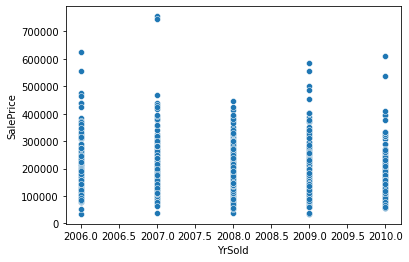

In [7]:
sns.scatterplot(x = 'YrSold',y = 'SalePrice', data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

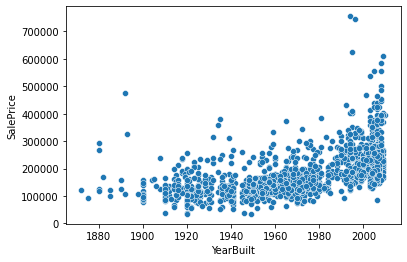

In [8]:
sns.scatterplot(x = 'YearBuilt',y = 'SalePrice', data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

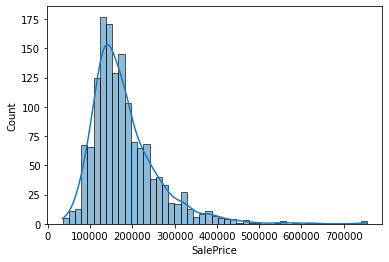

In [9]:
sns.histplot(df.SalePrice,kde =True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

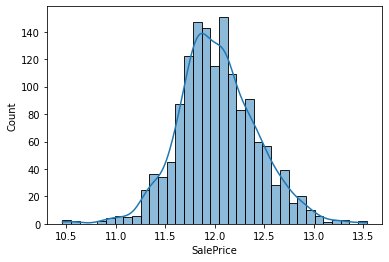

In [10]:
# reduce the skewness
sns.histplot(np.log(df.SalePrice),kde =True)

In [11]:
# Sort data by YearBuilt 
df.sort_values(by = 'YearBuilt',inplace = True,ascending =True)
df.YearBuilt.head(10)

1349    1872
1137    1875
747     1880
304     1880
1132    1880
630     1880
991     1882
106     1885
1416    1885
945     1890
Name: YearBuilt, dtype: int64

### Make a copy of Original DataFrame

In [12]:
tmp_df = df.copy()

In [13]:
tmp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1137,1138,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1132,1133,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500


### Filling numerical missing values

In [14]:
# find numerical null values
for label , content in tmp_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
           print(label)
         

LotFrontage
MasVnrArea
GarageYrBlt


In [15]:
# fill numerical columns
tmp_df['MasVnrArea'].fillna(tmp_df.MasVnrArea.median(),inplace =True)
tmp_df['GarageYrBlt'].fillna(tmp_df['YearBuilt'],inplace =True)
tmp_df['LotFrontage'].fillna(tmp_df['LotFrontage'].median(),inplace =True)

In [16]:
# if any missing numerical values
for label , content in tmp_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [17]:
# non_numeric null values
for label , content in tmp_df.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
           print(label)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [18]:
# fill null values of non-numerric data type
tmp_df['Alley'].fillna('No alley access',inplace =True)
tmp_df['MasVnrType'].fillna(tmp_df.MasVnrType.mode()[0],inplace =True)
tmp_df['BsmtQual'].fillna('No Basement',inplace =True)
tmp_df['BsmtCond'].fillna('No Basement',inplace =True)
tmp_df['BsmtExposure'].fillna('No Basement',inplace =True)
tmp_df['BsmtFinType1'].fillna('No Basement',inplace =True)
tmp_df['BsmtFinType2'].fillna('No Basement',inplace =True)
tmp_df['Electrical'].fillna(tmp_df['Electrical'].mode()[0],inplace =True)
tmp_df['FireplaceQu'].fillna('No Fireplace',inplace =True)
tmp_df['GarageType'].fillna('No Garage',inplace =True)
tmp_df['GarageFinish'].fillna('No Garage',inplace =True)
tmp_df['GarageQual'].fillna('No Garage',inplace =True)
tmp_df['GarageCond'].fillna('No Garage',inplace =True)
tmp_df['PoolQC'].fillna('No Pool',inplace =True)
tmp_df['Fence'].fillna('No Fence',inplace =True)
tmp_df['MiscFeature'].fillna('None',inplace =True)

In [19]:
# if any other null values in object type data
for label , content in tmp_df.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [20]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overal

In [21]:
# convert object data into catogory and then in numbers
for label , content in tmp_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # conert string data into category
        tmp_df[label] = content.astype('category').cat.as_ordered()
        # turn categorical data into numbers
        tmp_df[label] = pd.Categorical(content).codes

In [22]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  Overal

### Machine learning algorithem
#### Regression Using Log Prices

In [33]:
# define data into features and target
x = tmp_df.drop(columns ='SalePrice')
y = np.log(tmp_df['SalePrice'])

# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.29,
                                                 random_state = 42)



In [34]:
# fit diffrent models
# 1. linear svc model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
print(f'lr_score:{lr.score(X_test,y_test)}')

lr_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**lr_pred))}')

lr_score:0.8933032503446433
Regression model metrics on test set
Root_mean_squared_log_error:0.12988119682241914


In [35]:
# Ridge regressor model
from sklearn.linear_model import Ridge
rr = Ridge( random_state = 42)
rr.fit(X_train,y_train)
print(f'rr_score:{rr.score(X_test,y_test)}')

rr_pred = rr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**rr_pred))}')

rr_score:0.8935239700335792
Regression model metrics on test set
Root_mean_squared_log_error:0.129746787432378


In [36]:
# BayesianRidge regressor model
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train,y_train)
print(f'br_score:{br.score(X_test,y_test)}')

br_pred = br.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**br_pred))}')

br_score:0.8960353706867802
Regression model metrics on test set
Root_mean_squared_log_error:0.12820752182076703


In [37]:
# kernel_ridge Regression model
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()
krr.fit(X_train,y_train)
print(f'krr_score:{krr.score(X_test,y_test)}')

krr_pred = krr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**krr_pred))}')

krr_score:0.89143396810602
Regression model metrics on test set
Root_mean_squared_log_error:0.13101399020177965


In [38]:
# random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_jobs = -1, random_state = 42)
rfg.fit(X_train,y_train)
print(f'rfg_score:{rfg.score(X_test,y_test)}')

rfg_pred = rfg.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**rfg_pred))}')

rfg_score:0.881065944421175
Regression model metrics on test set
Root_mean_squared_log_error:0.1371272492851085


In [39]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)
print(f'gbr_score:{gbr.score(X_test,y_test)}')

gbr_pred = gbr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**gbr_pred))}')

gbr_score:0.8952151858245605
Regression model metrics on test set
Root_mean_squared_log_error:0.1287121986135267


In [40]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)
print(f'dtr_score:{dtr.score(X_test,y_test)}')

dtr_pred = dtr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**dtr_pred))}')

dtr_score:0.7323433614594967
Regression model metrics on test set
Root_mean_squared_log_error:0.2057118408530356


In [41]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state = 42)
abr.fit(X_train,y_train)
abr.score(X_test,y_test)
print(f'abr_score:{abr.score(X_test,y_test)}')

abr_pred = abr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**abr_pred))}')

abr_score:0.8166521247195492
Regression model metrics on test set
Root_mean_squared_log_error:0.17025846244157647


In [42]:
# VotingRegressor
from sklearn.ensemble import VotingRegressor
estimators = [('br',br),('gbr' , gbr)]
vr = VotingRegressor(estimators,n_jobs = -1 , verbose = 2)
vr.fit(X_train,y_train)
vr.score(X_test,y_test)
print(f'vr_score:{vr.score(X_test,y_test)}')

vr_pred = vr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**vr_pred))}')

vr_score:0.9076582490962029
Regression model metrics on test set
Root_mean_squared_log_error:0.12082857323659665


In [43]:
# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gbr' , gbr),('br',br),('rr',rr),('lr',lr)]
sr = StackingRegressor(estimators)
sr.fit(X_train,y_train)
sr.score(X_test,y_test)
print(f'sr_score:{sr.score(X_test,y_test)}')

sr_pred = sr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**sr_pred))}')

sr_score:0.9015319599336586
Regression model metrics on test set
Root_mean_squared_log_error:0.1247722972604441


### p-values and coefficients

In [55]:
import statsmodels.api as sm
X_inc_con = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_con)
results = model.fit()
p_co =pd.DataFrame({'coef.' : round(results.params,3),'p-value': round(results.pvalues,3)})
p_co.style.set_caption('p-values and coefficie')

,coef.,p-value
const,14.171000,0.051000
Id,-0.000000,0.158000
MSSubClass,-0.000000,0.688000
MSZoning,-0.016000,0.080000
LotFrontage,-0.001000,0.001000
LotArea,0.000000,0.006000
Street,0.121000,0.086000
Alley,0.041000,0.044000
LotShape,-0.011000,0.002000
LandContour,0.012000,0.099000


In [57]:
p_co[p_co['p-value'] > 0.05]

,coef.,p-value
const,14.171,0.051
Id,-0.000,0.158
MSSubClass,-0.000,0.688
MSZoning,-0.016,0.080
Street,0.121,0.086
LandContour,0.012,0.099
Utilities,-0.182,0.236
LotConfig,-0.000,0.949
LandSlope,0.026,0.232
Neighborhood,0.002,0.057


### Variance Inflation Factor

In [85]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

# loop for getting all columns vif
vif = [] # create empty list
for i in range(X_inc_con.shape[1]):
    vif.append(variance_inflation_factor(exog = X_inc_con.values,exog_idx = i))


vi = pd.DataFrame({'coef_name' : X_inc_con.columns,
              'vif'       : np.around(vif,2)})
vi.style.set_caption('Variance_inflation_factor')

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,coef_name,vif
0,const,2625860.180000
1,Id,1.100000
2,MSSubClass,5.540000
3,MSZoning,1.560000
4,LotFrontage,1.810000
5,LotArea,1.630000
6,Street,1.200000
7,Alley,1.240000
8,LotShape,1.290000
9,LandContour,1.380000


In [ ]:
# Cross Validate score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(vr,x,y,cv=9,
                              n_jobs=-1,
                             verbose=2,scoring = None)
cv.mean()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_grid = { 'n_estimators': np.arange(10,100,10),
            'max_features': [0.5,1,'auto','sqrt'],
            'min_samples_leaf': np.arange(1,20,2),
            'min_samples_split': np.arange(2,20,2),
            'max_depth': [None,3,5,10] }

rs = RandomizedSearchCV(GradientBoostingRegressor(random_state = 42),
                        param_distributions = rs_grid,
                        n_iter=171,
                        cv=5,
                        verbose=True,
                        n_jobs=-1)
    
rs.fit(X_train,y_train)
rs.fit(X_train,y_train)
rs.score(X_test,y_test)
print(f'rs_score:{rs.score(X_test,y_test)}')

rs_pred = rs.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(np.e**y_test,np.e**rs_pred))}')


### Make prediction on test data set

In [ ]:
test_df = pd.read_csv(r'new_test_df.csv')

In [ ]:
test_df.head()

In [ ]:
test_df.shape

In [ ]:
# find column difference between training and test data set 
set(X_train.columns) - set(test_df.columns)

In [ ]:
# make prediction on test data set
test_pred = np.e**vr.predict(test_df)
test_pred

In [ ]:
len(test_pred)

In [ ]:
# Format predictions into the same format as Kaggle wants
df_preds = pd.DataFrame()
df_preds['Id'] = test_df['Id']
df_preds['SalePrice'] = test_pred
df_preds.head()

In [ ]:
# export prediction data 
df_preds.to_csv('Kaggle_advanced_regression_submission_csv_new(sorttestdata)vr(test_size 0.26)_regressor',index = False)

#### Regression using without Log Prices

In [ ]:
# define data into features and target
x = tmp_df.drop(columns ='SalePrice')
y = tmp_df['SalePrice']

# split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.29,
                                                 random_state =42)



In [ ]:
# fit diffrent models
# 1. linear svc model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
print(f'lr_score:{lr.score(X_test,y_test)}')

lr_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(y_test,lr_pred))}')

In [ ]:
# random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_jobs = -1, random_state = 42)
rfg.fit(X_train,y_train)
print(f'rfg_score:{rfg.score(X_test,y_test)}')

rfg_pred = rfg.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(y_test,rfg_pred))}')

In [ ]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)
print(f'gbr_score:{gbr.score(X_test,y_test)}')

gbr_pred = gbr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(y_test,gbr_pred))}')

In [ ]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)
print(f'dtr_score:{dtr.score(X_test,y_test)}')

dtr_pred = dtr.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print('Regression model metrics on test set')
print(f'Root_mean_squared_log_error:{np.sqrt(mean_squared_log_error(y_test,dtr_pred))}')